Notebook pour tester le code en C

In [1]:
from ctypes import *
import matplotlib.pyplot as plt
import random
import numpy as np
from dataclasses import dataclass
import math

Importation du DLL

In [2]:
path_to_dll = "C:/Users/Toky Cedric/Desktop/Etudes/Projet Annuel/CPPDLL_ForPython/cmake-build-debug/CPPDLL_ForPython.dll"
mylib = cdll.LoadLibrary(path_to_dll)

[-0.029787    0.30208147]
[-3.0506017208099365, -2.7485203742980957, -2.446438789367676, -2.144357204437256, -1.842275857925415, -1.5401942729949951, -1.2381129264831543, -0.9360314011573792, -0.6339499354362488, -0.3318684697151184, -0.029787003993988037, 0.27229446172714233, 0.5743759274482727, 0.8764573931694031, 1.1785387992858887, 1.4806203842163086, 1.7827017307281494, 2.0847830772399902, 2.38686466217041, 2.68894624710083, 2.991027593612671]


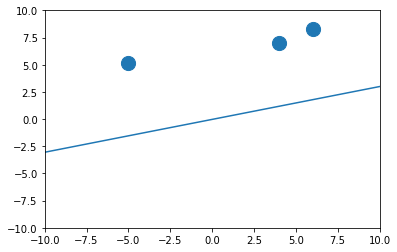

[6.4053397  0.25679615]
[3.8373782634735107, 4.094174385070801, 4.350970268249512, 4.607766628265381, 4.86456298828125, 5.121358871459961, 5.37815523147583, 5.634951114654541, 5.89174747467041, 6.148543357849121, 6.40533971786499, 6.662136077880859, 6.91893196105957, 7.1757283210754395, 7.43252420425415, 7.6893205642700195, 7.9461164474487305, 8.202913284301758, 8.459709167480469, 8.71650505065918, 8.97330093383789]
here


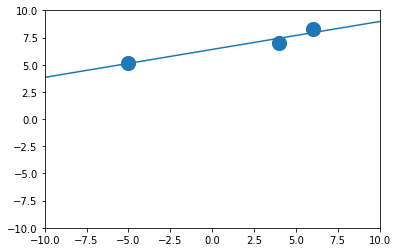

In [28]:
dataset_inputs = [
                [-5],
                [4],
                [6],
]

 

dataset_expected_outputs = [
                5.2,
                7.0,
                8.3
]

 

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

 

model = mylib.create_linear_model(1)
x = np.ctypeslib.as_array(model, (2,))
#arrsize = len(model)
#arrtype = c_float * arrsize
#arr = arrtype(*model)

 

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(float(p[0]))

 

test_dataset_inputs = []
for i in range(-10, 11):
    test_dataset_inputs.append(i)
    
#mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), c_int]
#mylib.predict_linear_model_regression.restype = c_float 

 

predicted_outputs = []

for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    predicted_outputs.append(tmp)


arrX = np.ctypeslib.as_array(model, (2,))
print(x)
print(predicted_outputs)
 


#np_arr = np.ctypelib.as_arr()
plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

####

arr_flat_size = len(flattened_dataset_inputs)
arr_flat_type = c_float * arr_flat_size
arr_flattened_dataset_inputs = arr_flat_type(*flattened_dataset_inputs)

arr_dataset_size = len(dataset_expected_outputs)
arr_dataset_type = c_float * arr_dataset_size
arr_dataset = arr_dataset_type(*dataset_expected_outputs)

mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), arr_flat_type, arr_dataset_type, c_int, c_int,c_int]

mylib.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset,2,len(flattened_dataset_inputs), len(dataset_expected_outputs))

test_dataset_inputs = []
for i in range(-10, 11):
    temp = i
    test_dataset_inputs.append(float(temp))
    
result = []
for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    result.append(tmp)
    
print(x)
print(result)
print("here")
plt.plot(test_dataset_inputs, result)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

mylib.destroy_linear_model(model)
